## Tarea 3
### El día de más movilidad en cuarentena en RM, se usó más el auto o caminar?

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [61]:
Mov = pd.read_csv('C:/Users/Manuel Muñoz Riveros/Desktop/Análisis de Datos/Tareas/applemobilitytrends-2021-11-30.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [62]:
Mov

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,195.27,162.10,146.16,143.96,149.85,181.39,175.75,180.37,166.94,152.35
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,206.78,204.82,218.64,226.52,230.23,200.72,195.78,159.66,164.26,181.32
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,123.93,94.85,92.71,96.29,104.06,131.87,141.64,77.77,86.90,93.26
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,89.95,65.60,86.73,92.37,100.81,121.46,114.41,55.37,89.50,94.21
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,112.92,116.81,121.05,124.84,134.17,132.88,109.25,116.27,120.49,128.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,county,York County,walking,NaN,Pennsylvania,United States,100.0,110.22,121.82,109.72,...,163.04,196.69,212.27,255.52,125.52,219.56,227.24,164.75,184.97,200.06
4687,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,174.93,185.37,209.01,207.59,144.58,255.76,171.82,194.17,147.09,160.43
4688,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,136.05,157.21,163.42,181.13,125.34,153.90,160.91,142.14,161.02,160.95
4689,county,Yuma County,driving,NaN,Arizona,United States,100.0,101.82,106.67,108.93,...,140.58,159.95,171.67,217.98,122.50,179.38,187.79,179.51,149.77,146.23


In [63]:
Mov.drop('geo_type', axis=1, inplace=True)
Mov.drop('alternative_name', axis=1, inplace=True)
Mov.drop('region', axis=1, inplace=True)
Mov

,transportation_type,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30
0,driving,NaN,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,...,195.27,162.10,146.16,143.96,149.85,181.39,175.75,180.37,166.94,152.35
1,walking,NaN,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,...,206.78,204.82,218.64,226.52,230.23,200.72,195.78,159.66,164.26,181.32
2,driving,NaN,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,...,123.93,94.85,92.71,96.29,104.06,131.87,141.64,77.77,86.90,93.26
3,walking,NaN,NaN,100.0,95.11,101.37,112.67,116.72,114.14,84.54,...,89.95,65.60,86.73,92.37,100.81,121.46,114.41,55.37,89.50,94.21
4,driving,NaN,NaN,100.0,102.98,104.21,108.63,109.08,89.00,99.35,...,112.92,116.81,121.05,124.84,134.17,132.88,109.25,116.27,120.49,128.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,walking,Pennsylvania,United States,100.0,110.22,121.82,109.72,140.72,102.87,117.24,...,163.04,196.69,212.27,255.52,125.52,219.56,227.24,164.75,184.97,200.06
4687,driving,Texas,United States,100.0,98.85,97.76,92.21,115.79,128.73,92.48,...,174.93,185.37,209.01,207.59,144.58,255.76,171.82,194.17,147.09,160.43
4688,driving,California,United States,100.0,102.98,103.10,114.08,118.83,121.49,93.29,...,136.05,157.21,163.42,181.13,125.34,153.90,160.91,142.14,161.02,160.95
4689,driving,Arizona,United States,100.0,101.82,106.67,108.93,135.92,124.77,92.88,...,140.58,159.95,171.67,217.98,122.50,179.38,187.79,179.51,149.77,146.23


In [64]:
casosRM = Mov[Mov["sub-region"]== "Santiago Metropolitan Region"]
casosRM

,transportation_type,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30
791,driving,Santiago Metropolitan Region,Chile,100.0,101.96,105.49,107.92,120.69,98.55,67.72,...,159.85,96.34,106.04,108.06,118.55,140.18,124.89,77.73,101.78,109.77
792,walking,Santiago Metropolitan Region,Chile,100.0,104.69,106.20,105.99,105.57,69.28,43.79,...,173.77,92.94,101.01,102.04,108.99,122.01,99.27,57.31,97.68,106.98


In [65]:
RM = casosRM.melt(id_vars=["transportation_type","sub-region", "country"], var_name="Fecha", value_name="Indice_Movilidad_RM")
RM

,transportation_type,sub-region,country,Fecha,Indice_Movilidad_RM
0,driving,Santiago Metropolitan Region,Chile,2020-01-13,100.00
1,walking,Santiago Metropolitan Region,Chile,2020-01-13,100.00
2,driving,Santiago Metropolitan Region,Chile,2020-01-14,101.96
3,walking,Santiago Metropolitan Region,Chile,2020-01-14,104.69
4,driving,Santiago Metropolitan Region,Chile,2020-01-15,105.49
...,...,...,...,...,...
1371,walking,Santiago Metropolitan Region,Chile,2021-11-28,57.31
1372,driving,Santiago Metropolitan Region,Chile,2021-11-29,101.78
1373,walking,Santiago Metropolitan Region,Chile,2021-11-29,97.68
1374,driving,Santiago Metropolitan Region,Chile,2021-11-30,109.77


In [66]:
RM['Fecha'] = pd.to_datetime(RM['Fecha'])

In [67]:
RM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transportation_type  1376 non-null   object        
 1   sub-region           1376 non-null   object        
 2   country              1376 non-null   object        
 3   Fecha                1376 non-null   datetime64[ns]
 4   Indice_Movilidad_RM  1370 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 53.9+ KB


In [68]:
Fases = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto74/paso_a_paso.csv')

In [69]:
Fases.head()

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,4,4,4,4,4
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,4,4,4,4,4
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4


In [70]:
Fases.drop('codigo_comuna', axis=1, inplace=True)
Fases.drop('zona', axis=1, inplace=True)
Fases.drop('comuna_residencia', axis=1, inplace=True)
Fases.dropna()
Fases

,codigo_region,region_residencia,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,...,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01
0,15,Arica y Parinacota,3,3,3,3,3,3,3,3,...,3,3,3,3,3,4,4,4,4,4
1,15,Arica y Parinacota,1,1,1,1,1,1,1,1,...,3,3,3,3,3,4,4,4,4,4
2,15,Arica y Parinacota,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
3,15,Arica y Parinacota,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
4,15,Arica y Parinacota,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,12,Magallanes,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
384,12,Magallanes,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
385,12,Magallanes,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
386,12,Magallanes,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4


In [71]:
FiltroRM = Fases[Fases["codigo_region"]== 13]
FiltroRM

,codigo_region,region_residencia,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,...,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01
87,13,Metropolitana,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
88,13,Metropolitana,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
89,13,Metropolitana,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
90,13,Metropolitana,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
91,13,Metropolitana,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
92,13,Metropolitana,2,2,2,2,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
93,13,Metropolitana,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
94,13,Metropolitana,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
95,13,Metropolitana,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
96,13,Metropolitana,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3


In [72]:
Fases1 = FiltroRM.melt(id_vars=["codigo_region","region_residencia"], var_name="Fecha", value_name="Fase")
Fases1

,codigo_region,region_residencia,Fecha,Fase
0,13,Metropolitana,2020-07-28,3
1,13,Metropolitana,2020-07-28,1
2,13,Metropolitana,2020-07-28,1
3,13,Metropolitana,2020-07-28,1
4,13,Metropolitana,2020-07-28,1
...,...,...,...,...
27055,13,Metropolitana,2021-12-01,3
27056,13,Metropolitana,2021-12-01,3
27057,13,Metropolitana,2021-12-01,3
27058,13,Metropolitana,2021-12-01,3


In [73]:
Fases1['fecha'] = pd.to_datetime(Fases1['Fecha'])
Fases1

,codigo_region,region_residencia,Fecha,Fase,fecha
0,13,Metropolitana,2020-07-28,3,2020-07-28
1,13,Metropolitana,2020-07-28,1,2020-07-28
2,13,Metropolitana,2020-07-28,1,2020-07-28
3,13,Metropolitana,2020-07-28,1,2020-07-28
4,13,Metropolitana,2020-07-28,1,2020-07-28
...,...,...,...,...,...
27055,13,Metropolitana,2021-12-01,3,2021-12-01
27056,13,Metropolitana,2021-12-01,3,2021-12-01
27057,13,Metropolitana,2021-12-01,3,2021-12-01
27058,13,Metropolitana,2021-12-01,3,2021-12-01


In [74]:
Fases1.drop('Fecha', axis=1, inplace=True)
Fases1

,codigo_region,region_residencia,Fase,fecha
0,13,Metropolitana,3,2020-07-28
1,13,Metropolitana,1,2020-07-28
2,13,Metropolitana,1,2020-07-28
3,13,Metropolitana,1,2020-07-28
4,13,Metropolitana,1,2020-07-28
...,...,...,...,...
27055,13,Metropolitana,3,2021-12-01
27056,13,Metropolitana,3,2021-12-01
27057,13,Metropolitana,3,2021-12-01
27058,13,Metropolitana,3,2021-12-01


In [75]:
Cuarentena = Fases1[Fases1["Fase"]== 1]
Cuarentena

,codigo_region,region_residencia,Fase,fecha
1,13,Metropolitana,1,2020-07-28
2,13,Metropolitana,1,2020-07-28
3,13,Metropolitana,1,2020-07-28
4,13,Metropolitana,1,2020-07-28
6,13,Metropolitana,1,2020-07-28
...,...,...,...,...
18892,13,Metropolitana,1,2021-07-06
18921,13,Metropolitana,1,2021-07-07
18927,13,Metropolitana,1,2021-07-07
18928,13,Metropolitana,1,2021-07-07


In [76]:
RMFases = pd.merge(left = Cuarentena, right = RM, how ='left', left_on = 'fecha', right_on='Fecha')

In [77]:
RMFases

,codigo_region,region_residencia,Fase,fecha,transportation_type,sub-region,country,Fecha,Indice_Movilidad_RM
0,13,Metropolitana,1,2020-07-28,driving,Santiago Metropolitan Region,Chile,2020-07-28,55.01
1,13,Metropolitana,1,2020-07-28,walking,Santiago Metropolitan Region,Chile,2020-07-28,34.86
2,13,Metropolitana,1,2020-07-28,driving,Santiago Metropolitan Region,Chile,2020-07-28,55.01
3,13,Metropolitana,1,2020-07-28,walking,Santiago Metropolitan Region,Chile,2020-07-28,34.86
4,13,Metropolitana,1,2020-07-28,driving,Santiago Metropolitan Region,Chile,2020-07-28,55.01
...,...,...,...,...,...,...,...,...,...
12631,13,Metropolitana,1,2021-07-07,walking,Santiago Metropolitan Region,Chile,2021-07-07,81.82
12632,13,Metropolitana,1,2021-07-07,driving,Santiago Metropolitan Region,Chile,2021-07-07,96.58
12633,13,Metropolitana,1,2021-07-07,walking,Santiago Metropolitan Region,Chile,2021-07-07,81.82
12634,13,Metropolitana,1,2021-07-07,driving,Santiago Metropolitan Region,Chile,2021-07-07,96.58


In [78]:
CombinadaRM = RMFases[RMFases["sub-region"]== "Santiago Metropolitan Region"]
CombinadaRM

,codigo_region,region_residencia,Fase,fecha,transportation_type,sub-region,country,Fecha,Indice_Movilidad_RM
0,13,Metropolitana,1,2020-07-28,driving,Santiago Metropolitan Region,Chile,2020-07-28,55.01
1,13,Metropolitana,1,2020-07-28,walking,Santiago Metropolitan Region,Chile,2020-07-28,34.86
2,13,Metropolitana,1,2020-07-28,driving,Santiago Metropolitan Region,Chile,2020-07-28,55.01
3,13,Metropolitana,1,2020-07-28,walking,Santiago Metropolitan Region,Chile,2020-07-28,34.86
4,13,Metropolitana,1,2020-07-28,driving,Santiago Metropolitan Region,Chile,2020-07-28,55.01
...,...,...,...,...,...,...,...,...,...
12631,13,Metropolitana,1,2021-07-07,walking,Santiago Metropolitan Region,Chile,2021-07-07,81.82
12632,13,Metropolitana,1,2021-07-07,driving,Santiago Metropolitan Region,Chile,2021-07-07,96.58
12633,13,Metropolitana,1,2021-07-07,walking,Santiago Metropolitan Region,Chile,2021-07-07,81.82
12634,13,Metropolitana,1,2021-07-07,driving,Santiago Metropolitan Region,Chile,2021-07-07,96.58


In [79]:
WalkingRM = CombinadaRM[CombinadaRM["transportation_type"]== "walking"]
WalkingRM

,codigo_region,region_residencia,Fase,fecha,transportation_type,sub-region,country,Fecha,Indice_Movilidad_RM
1,13,Metropolitana,1,2020-07-28,walking,Santiago Metropolitan Region,Chile,2020-07-28,34.86
3,13,Metropolitana,1,2020-07-28,walking,Santiago Metropolitan Region,Chile,2020-07-28,34.86
5,13,Metropolitana,1,2020-07-28,walking,Santiago Metropolitan Region,Chile,2020-07-28,34.86
7,13,Metropolitana,1,2020-07-28,walking,Santiago Metropolitan Region,Chile,2020-07-28,34.86
9,13,Metropolitana,1,2020-07-28,walking,Santiago Metropolitan Region,Chile,2020-07-28,34.86
...,...,...,...,...,...,...,...,...,...
12627,13,Metropolitana,1,2021-07-06,walking,Santiago Metropolitan Region,Chile,2021-07-06,74.16
12629,13,Metropolitana,1,2021-07-07,walking,Santiago Metropolitan Region,Chile,2021-07-07,81.82
12631,13,Metropolitana,1,2021-07-07,walking,Santiago Metropolitan Region,Chile,2021-07-07,81.82
12633,13,Metropolitana,1,2021-07-07,walking,Santiago Metropolitan Region,Chile,2021-07-07,81.82


In [80]:
WalkingRM['Indice_Movilidad_RM'].max()

101.99

In [81]:
MaximoWalking = WalkingRM[WalkingRM["Indice_Movilidad_RM"]== 101.99]
MaxWalking = MaximoWalking.drop_duplicates()
MaxWalking

,codigo_region,region_residencia,Fase,fecha,transportation_type,sub-region,country,Fecha,Indice_Movilidad_RM
10575,13,Metropolitana,1,2021-06-11,walking,Santiago Metropolitan Region,Chile,2021-06-11,101.99


In [82]:
DrivingRM = CombinadaRM[CombinadaRM["transportation_type"]== "driving"]
DrivingRM

,codigo_region,region_residencia,Fase,fecha,transportation_type,sub-region,country,Fecha,Indice_Movilidad_RM
0,13,Metropolitana,1,2020-07-28,driving,Santiago Metropolitan Region,Chile,2020-07-28,55.01
2,13,Metropolitana,1,2020-07-28,driving,Santiago Metropolitan Region,Chile,2020-07-28,55.01
4,13,Metropolitana,1,2020-07-28,driving,Santiago Metropolitan Region,Chile,2020-07-28,55.01
6,13,Metropolitana,1,2020-07-28,driving,Santiago Metropolitan Region,Chile,2020-07-28,55.01
8,13,Metropolitana,1,2020-07-28,driving,Santiago Metropolitan Region,Chile,2020-07-28,55.01
...,...,...,...,...,...,...,...,...,...
12626,13,Metropolitana,1,2021-07-06,driving,Santiago Metropolitan Region,Chile,2021-07-06,89.42
12628,13,Metropolitana,1,2021-07-07,driving,Santiago Metropolitan Region,Chile,2021-07-07,96.58
12630,13,Metropolitana,1,2021-07-07,driving,Santiago Metropolitan Region,Chile,2021-07-07,96.58
12632,13,Metropolitana,1,2021-07-07,driving,Santiago Metropolitan Region,Chile,2021-07-07,96.58


In [83]:
DrivingRM['Indice_Movilidad_RM'].max()

122.59

In [84]:
MaximoDriving = DrivingRM[DrivingRM["Indice_Movilidad_RM"]== 122.59]
MaxDriving = MaximoDriving.drop_duplicates()
MaxDriving

,codigo_region,region_residencia,Fase,fecha,transportation_type,sub-region,country,Fecha,Indice_Movilidad_RM
10574,13,Metropolitana,1,2021-06-11,driving,Santiago Metropolitan Region,Chile,2021-06-11,122.59


In [85]:
data = np.unique([[101.99], [122.59]], return_counts = True)
labs = ["% Walking", "% Driving"]
data

(array([101.99, 122.59]), array([1, 1], dtype=int64))

[Text(0.5, 0, ''), Text(0, 0.5, '%')]

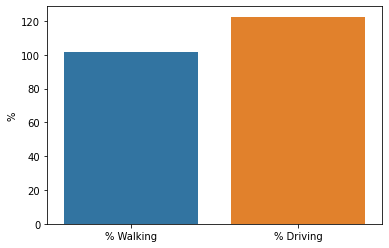

In [86]:
plt = sns.barplot(x= labs, y = data[0])
plt.set(xlabel = "", ylabel= "%")

Según el gráfico y los datos anteriores se puede decir que el día con más movilidad en cuarentena en la Región Metropolitana ( 6 de junio de 2021), las personas utilizaron más el auto para movilizarse.

### Se visitaban más los parques en cuarentena?

In [87]:
Movilidad_Local = pd.read_csv("C:/Users\Manuel Muñoz Riveros/Desktop/Análisis de Datos/Tareas/Chile.csv")

In [88]:
Movilidad_Local

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-01,-87.0,-82.0,-59.0,-75.0,-78.0,29.0
1,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-02,-62.0,-32.0,-57.0,-51.0,-36.0,20.0
2,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-03,-60.0,-35.0,-56.0,-43.0,-18.0,16.0
3,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-04,-26.0,-5.0,-34.0,-24.0,-20.0,12.0
4,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-05,-26.0,-4.0,-32.0,-24.0,-20.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23567,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2021-11-24,-13.0,2.0,-32.0,9.0,16.0,10.0
23568,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2021-11-25,-13.0,4.0,-26.0,11.0,18.0,9.0
23569,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2021-11-26,-12.0,3.0,-23.0,3.0,15.0,10.0
23570,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2021-11-27,-13.0,2.0,-31.0,-5.0,2.0,8.0


In [89]:
Movilidad_Local = Movilidad_Local.drop(["metro_area", "iso_3166_2_code", "census_fips_code", "place_id", "country_region_code"], axis = 1)
Movilidad_Local = Movilidad_Local.dropna()

In [90]:
Movilidad_Local['Fecha'] = pd.to_datetime(Movilidad_Local['date'])

In [91]:
Movilidad_Local_RM = Movilidad_Local[Movilidad_Local["sub_region_1"] == "Santiago Metropolitan Region"]
Movilidad_Local_RM

,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Fecha
17596,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-01-01,-76.0,-75.0,-41.0,-65.0,-79.0,36.0,2021-01-01
17597,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-01-02,-37.0,-26.0,13.0,-45.0,-30.0,23.0,2021-01-02
17599,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-01-04,7.0,8.0,32.0,14.0,-16.0,13.0,2021-01-04
17600,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-01-05,6.0,8.0,36.0,-3.0,-10.0,12.0,2021-01-05
17601,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-01-06,0.0,4.0,13.0,-8.0,-11.0,13.0,2021-01-06
...,...,...,...,...,...,...,...,...,...,...,...
19583,Chile,Santiago Metropolitan Region,Talagante Province,2021-11-24,23.0,25.0,-4.0,-8.0,23.0,9.0,2021-11-24
19584,Chile,Santiago Metropolitan Region,Talagante Province,2021-11-25,24.0,25.0,5.0,-5.0,20.0,9.0,2021-11-25
19585,Chile,Santiago Metropolitan Region,Talagante Province,2021-11-26,26.0,30.0,-2.0,-2.0,20.0,10.0,2021-11-26
19586,Chile,Santiago Metropolitan Region,Talagante Province,2021-11-27,9.0,20.0,-4.0,-15.0,14.0,7.0,2021-11-27


In [92]:
Park_Max = Movilidad_Local_RM["parks_percent_change_from_baseline"].max()
Park_Max

68.0

In [93]:
ParquesMax = Movilidad_Local_RM[Movilidad_Local_RM["parks_percent_change_from_baseline"] == 68]
ParquesMax

,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Fecha
17870,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-10-02,43.0,41.0,68.0,33.0,25.0,7.0,2021-10-02


In [94]:
cuarentena_df = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto74/paso_a_paso.csv?raw=true')
cuarentena_df

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,4,4,4,4,4
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,4,4,4,4,4
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,12,Magallanes,12101,Punta Arenas,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
384,12,Magallanes,12103,Río Verde,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
385,12,Magallanes,12104,San Gregorio,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
386,12,Magallanes,12303,Timaukel,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4


In [95]:
cuarentena_df = cuarentena_df.drop(["codigo_comuna", "zona"], axis = 1)
cuarentena_df = cuarentena_df.dropna()

In [96]:
cuarentena_df = cuarentena_df[cuarentena_df["codigo_region"] == 13]
cuarentena_df

,codigo_region,region_residencia,comuna_residencia,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,...,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01
87,13,Metropolitana,Alhué,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
88,13,Metropolitana,Buin,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
89,13,Metropolitana,Calera de Tango,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
90,13,Metropolitana,Cerrillos,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
91,13,Metropolitana,Cerro Navia,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
92,13,Metropolitana,Colina,2,2,2,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
93,13,Metropolitana,Conchalí,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
94,13,Metropolitana,Curacaví,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
95,13,Metropolitana,Curacaví,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
96,13,Metropolitana,El Bosque,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3


In [97]:
cuarentena_df = pd.melt(cuarentena_df, id_vars = ['codigo_region','region_residencia',"comuna_residencia"], var_name = 'Fecha', value_name = "Fase")
cuarentena_df

,codigo_region,region_residencia,comuna_residencia,Fecha,Fase
0,13,Metropolitana,Alhué,2020-07-28,3
1,13,Metropolitana,Buin,2020-07-28,1
2,13,Metropolitana,Calera de Tango,2020-07-28,1
3,13,Metropolitana,Cerrillos,2020-07-28,1
4,13,Metropolitana,Cerro Navia,2020-07-28,1
...,...,...,...,...,...
27055,13,Metropolitana,San Ramón,2021-12-01,3
27056,13,Metropolitana,Santiago,2021-12-01,3
27057,13,Metropolitana,Talagante,2021-12-01,3
27058,13,Metropolitana,Til Til,2021-12-01,3


In [98]:
cuarentena_df['fecha'] = pd.to_datetime(cuarentena_df['Fecha'])

In [99]:
cuarentena_df = cuarentena_df.drop(["Fecha"], axis = 1)
cuarentena_df

,codigo_region,region_residencia,comuna_residencia,Fase,fecha
0,13,Metropolitana,Alhué,3,2020-07-28
1,13,Metropolitana,Buin,1,2020-07-28
2,13,Metropolitana,Calera de Tango,1,2020-07-28
3,13,Metropolitana,Cerrillos,1,2020-07-28
4,13,Metropolitana,Cerro Navia,1,2020-07-28
...,...,...,...,...,...
27055,13,Metropolitana,San Ramón,3,2021-12-01
27056,13,Metropolitana,Santiago,3,2021-12-01
27057,13,Metropolitana,Talagante,3,2021-12-01
27058,13,Metropolitana,Til Til,3,2021-12-01


In [100]:
cuarentena_df = cuarentena_df[cuarentena_df["Fase"] == 1]
cuarentena_df

,codigo_region,region_residencia,comuna_residencia,Fase,fecha
1,13,Metropolitana,Buin,1,2020-07-28
2,13,Metropolitana,Calera de Tango,1,2020-07-28
3,13,Metropolitana,Cerrillos,1,2020-07-28
4,13,Metropolitana,Cerro Navia,1,2020-07-28
6,13,Metropolitana,Conchalí,1,2020-07-28
...,...,...,...,...,...
18892,13,Metropolitana,María Pinto,1,2021-07-06
18921,13,Metropolitana,Buin,1,2021-07-07
18927,13,Metropolitana,Curacaví,1,2021-07-07
18928,13,Metropolitana,Curacaví,1,2021-07-07


In [101]:
combinacion = pd.merge(left=cuarentena_df , right = Movilidad_Local , how='left' , left_on = 'fecha', right_on='Fecha')
combinacion

,codigo_region,region_residencia,comuna_residencia,Fase,fecha,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Fecha
0,13,Metropolitana,Buin,1,2020-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,13,Metropolitana,Calera de Tango,1,2020-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,13,Metropolitana,Cerrillos,1,2020-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,13,Metropolitana,Cerro Navia,1,2020-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,13,Metropolitana,Conchalí,1,2020-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182539,13,Metropolitana,María Pinto,1,2021-07-07,Chile,Valparaíso,Petorca Province,2021-07-07,-33.0,-31.0,-75.0,-34.0,-7.0,17.0,2021-07-07
182540,13,Metropolitana,María Pinto,1,2021-07-07,Chile,Valparaíso,Quillota Province,2021-07-07,-12.0,21.0,2.0,-35.0,3.0,11.0,2021-07-07
182541,13,Metropolitana,María Pinto,1,2021-07-07,Chile,Valparaíso,San Antonio Province,2021-07-07,-60.0,-41.0,-72.0,-72.0,-16.0,20.0,2021-07-07
182542,13,Metropolitana,María Pinto,1,2021-07-07,Chile,Valparaíso,San Felipe de Aconcagua,2021-07-07,-3.0,19.0,2.0,27.0,8.0,16.0,2021-07-07


In [102]:
combinacion = combinacion.dropna()
combinacion

,codigo_region,region_residencia,comuna_residencia,Fase,fecha,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Fecha
1662,13,Metropolitana,Cerrillos,1,2021-03-18,Chile,Antofagasta,Antofagasta Province,2021-03-18,-37.0,-15.0,-38.0,-12.0,-21.0,13.0,2021-03-18
1663,13,Metropolitana,Cerrillos,1,2021-03-18,Chile,Antofagasta,El Loa,2021-03-18,-28.0,-2.0,-51.0,-25.0,-8.0,11.0,2021-03-18
1664,13,Metropolitana,Cerrillos,1,2021-03-18,Chile,Araucania,Cautín Province,2021-03-18,-52.0,-28.0,-56.0,-32.0,-20.0,19.0,2021-03-18
1665,13,Metropolitana,Cerrillos,1,2021-03-18,Chile,Araucania,Malleco Province,2021-03-18,-34.0,-10.0,-40.0,-22.0,-4.0,17.0,2021-03-18
1666,13,Metropolitana,Cerrillos,1,2021-03-18,Chile,Arica y Parinacota,Arica Province,2021-03-18,-39.0,-8.0,-48.0,-25.0,-11.0,11.0,2021-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182539,13,Metropolitana,María Pinto,1,2021-07-07,Chile,Valparaíso,Petorca Province,2021-07-07,-33.0,-31.0,-75.0,-34.0,-7.0,17.0,2021-07-07
182540,13,Metropolitana,María Pinto,1,2021-07-07,Chile,Valparaíso,Quillota Province,2021-07-07,-12.0,21.0,2.0,-35.0,3.0,11.0,2021-07-07
182541,13,Metropolitana,María Pinto,1,2021-07-07,Chile,Valparaíso,San Antonio Province,2021-07-07,-60.0,-41.0,-72.0,-72.0,-16.0,20.0,2021-07-07
182542,13,Metropolitana,María Pinto,1,2021-07-07,Chile,Valparaíso,San Felipe de Aconcagua,2021-07-07,-3.0,19.0,2.0,27.0,8.0,16.0,2021-07-07


In [103]:
combinacion = combinacion[combinacion["sub_region_1"] == "Santiago Metropolitan Region"]
combinacion

,codigo_region,region_residencia,comuna_residencia,Fase,fecha,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Fecha
1688,13,Metropolitana,Cerrillos,1,2021-03-18,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-03-18,3.0,12.0,4.0,31.0,-5.0,14.0,2021-03-18
1689,13,Metropolitana,Cerrillos,1,2021-03-18,Chile,Santiago Metropolitan Region,Cordillera Province,2021-03-18,-19.0,1.0,-33.0,-5.0,-18.0,16.0,2021-03-18
1690,13,Metropolitana,Cerrillos,1,2021-03-18,Chile,Santiago Metropolitan Region,Maipo Province,2021-03-18,-12.0,3.0,-18.0,-13.0,-10.0,14.0,2021-03-18
1691,13,Metropolitana,Cerrillos,1,2021-03-18,Chile,Santiago Metropolitan Region,Melipilla Province,2021-03-18,-17.0,8.0,-38.0,15.0,-4.0,13.0,2021-03-18
1692,13,Metropolitana,Cerrillos,1,2021-03-18,Chile,Santiago Metropolitan Region,Santiago Province,2021-03-18,-34.0,-4.0,-35.0,-30.0,-26.0,18.0,2021-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182531,13,Metropolitana,María Pinto,1,2021-07-07,Chile,Santiago Metropolitan Region,Cordillera Province,2021-07-07,-9.0,2.0,-8.0,11.0,-17.0,16.0,2021-07-07
182532,13,Metropolitana,María Pinto,1,2021-07-07,Chile,Santiago Metropolitan Region,Maipo Province,2021-07-07,1.0,11.0,5.0,5.0,-4.0,14.0,2021-07-07
182533,13,Metropolitana,María Pinto,1,2021-07-07,Chile,Santiago Metropolitan Region,Melipilla Province,2021-07-07,6.0,29.0,-33.0,24.0,0.0,14.0,2021-07-07
182534,13,Metropolitana,María Pinto,1,2021-07-07,Chile,Santiago Metropolitan Region,Santiago Province,2021-07-07,-15.0,12.0,-20.0,-17.0,-19.0,17.0,2021-07-07


In [104]:
ParkMaxCuarentena = combinacion["parks_percent_change_from_baseline"].max()
ParkMaxCuarentena

58.0

In [105]:
ParqueMax_cuarentena = combinacion[combinacion["parks_percent_change_from_baseline"] == 58]
ParqueMax_cuarentena

,codigo_region,region_residencia,comuna_residencia,Fase,fecha,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Fecha
159362,13,Metropolitana,Alhué,1,2021-06-19,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-06-19,3.0,17.0,58.0,9.0,10.0,18.0,2021-06-19
159400,13,Metropolitana,Buin,1,2021-06-19,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-06-19,3.0,17.0,58.0,9.0,10.0,18.0,2021-06-19
159438,13,Metropolitana,Calera de Tango,1,2021-06-19,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-06-19,3.0,17.0,58.0,9.0,10.0,18.0,2021-06-19
159476,13,Metropolitana,Cerrillos,1,2021-06-19,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-06-19,3.0,17.0,58.0,9.0,10.0,18.0,2021-06-19
159514,13,Metropolitana,Cerro Navia,1,2021-06-19,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-06-19,3.0,17.0,58.0,9.0,10.0,18.0,2021-06-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181478,13,Metropolitana,Maipú,1,2021-07-03,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-07-03,12.0,18.0,58.0,25.0,13.0,17.0,2021-07-03
181516,13,Metropolitana,María Pinto,1,2021-07-03,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-07-03,12.0,18.0,58.0,25.0,13.0,17.0,2021-07-03
181554,13,Metropolitana,Melipilla,1,2021-07-03,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-07-03,12.0,18.0,58.0,25.0,13.0,17.0,2021-07-03
181592,13,Metropolitana,Melipilla,1,2021-07-03,Chile,Santiago Metropolitan Region,Chacabuco Province,2021-07-03,12.0,18.0,58.0,25.0,13.0,17.0,2021-07-03


In [110]:
data = np.unique([[58], [68]], return_counts = True)
labs = ["% ocupación cuarentena", "% ocupación nueva normalidad"]
data

(array([58, 68]), array([1, 1], dtype=int64))

[Text(0.5, 0, ''), Text(0, 0.5, '%')]

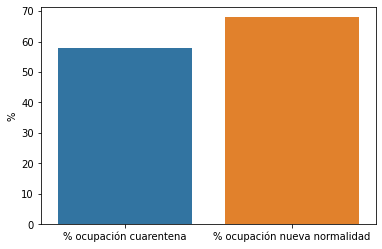

In [111]:
plt = sns.barplot(x= labs, y = data[0])
plt.set(xlabel = "", ylabel= "%")

Comparando el día de más movilidad en cuarentena vs la nueva normalidad se puede apreciar que el % de ocupación de los parques es mayor en la nueva normalidad (68%) que en cuarentena (58%)

### Manuel Muñoz Riveros en colaboración con Martín Marchant